# Global Superstore Sales & Profitability Analysis
## Prepared by: Hamadullah Rajper

### Project Objective
This project analyzes the **Global Superstore Dataset** to identify:
- Loss-making products
- Most profitable regions
- Key sales and profit drivers

**Role:** Data Analyst (Consulting Perspective)

**Skills Demonstrated:**
- Data Cleaning
- KPI Calculation (Sales, Profit, Profit Margin)
- Pivot-style Analysis
- Business Insights & Recommendations


## 1. Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.set_style("whitegrid")

<Figure size 800x500 with 0 Axes>

## 2. Loading Dataset

In [3]:
from google.colab import files
import pandas as pd
import io

# Step 1: Upload file from your PC
uploaded = files.upload()  # A file picker will open

# Step 2: Automatically get the uploaded filename
filename = list(uploaded.keys())[0]
print("Loading file:", filename)

# Step 3: Load into pandas
orders = pd.read_csv(io.BytesIO(uploaded[filename]))

# Step 4: Check
orders.head()


Saving raw train.csv to raw train.csv
Loading file: raw train.csv


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


## 3. Data Overview

In [4]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

## 4. Data Cleaning & Preparation
Convert Date Columns

In [5]:
orders["Order Date"] = pd.to_datetime(orders["Order Date"], errors="coerce")
orders["Ship Date"] = pd.to_datetime(orders["Ship Date"], errors="coerce")

## Check Missing value

In [6]:
orders.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,5841
Ship Date,5985
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


## 5. Handling missing values

In [7]:
# 1. Drop rows with missing dates (important for order/shipping analysis)
orders = orders.dropna(subset=['Order Date', 'Ship Date'])

# 2. Fill missing Postal Code with mode (most common postal code)
orders['Postal Code'] = orders['Postal Code'].fillna(orders['Postal Code'].mode()[0])

# 3. Verify no missing values remain
orders.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


## 6. KPI Calculations
Business Definitions

Total Sales: Sum of all sales revenue

Total Profit: Net profit after costs

Profit Margin: Profit ÷ Sales

In [8]:
# 1️⃣ Total Sales
total_sales = orders["Sales"].sum()
print(f"Total Sales: ${total_sales:,.2f}")
print("Total Profit and Profit Margin: Not available in this dataset")


Total Sales: $619,168.22
Total Profit and Profit Margin: Not available in this dataset


## 7. *Sales* by Region

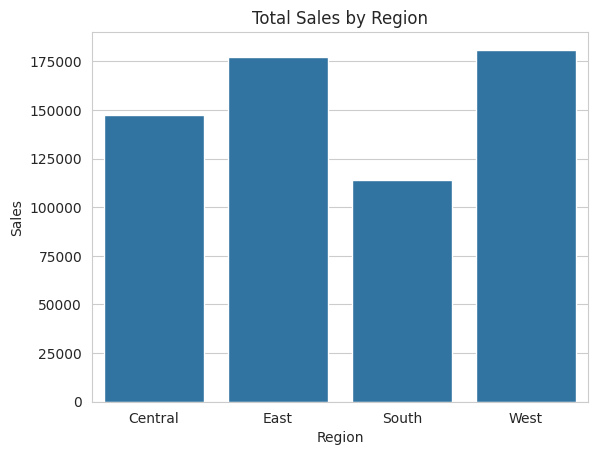

In [9]:
region_perf = orders.groupby("Region").agg(Total_Sales=("Sales", "sum")).reset_index()

import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(data=region_perf, x="Region", y="Total_Sales")
plt.title("Total Sales by Region")
plt.ylabel("Sales")
plt.show()

## 8. Sales by Category

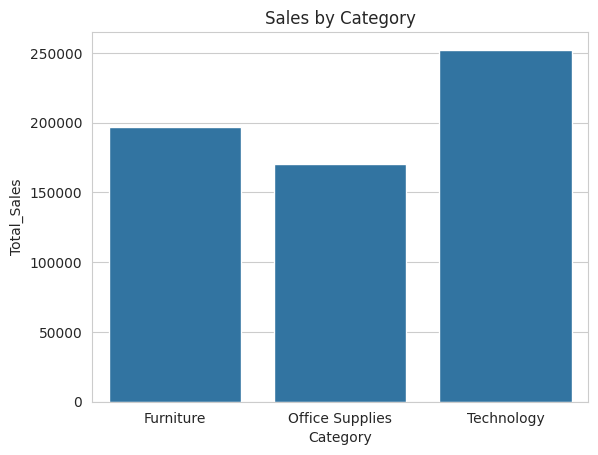

In [10]:
category_perf = orders.groupby("Category").agg(Total_Sales=("Sales", "sum")).reset_index()

sns.barplot(data=category_perf, x="Category", y="Total_Sales")
plt.title("Sales by Category")
plt.show()

## 9. Key Insight: High-Volume, Loss-Making Products
Product-Level Performance

In [11]:
# Product-Level Performance (only Sales available)
product_perf = orders.groupby("Product Name").agg(
    Total_Sales=("Sales", "sum")
).reset_index()

# Top 10 products by sales
top_products = product_perf.sort_values("Total_Sales", ascending=False).head(10)
top_products


,Product Name,Total_Sales
311,Canon imageCLASS 2200 Advanced Copier,17499.9500
746,Lexmark MX611dhe Monochrome Laser Printer,11219.9340
597,HP Designjet T520 Inkjet Large Format Printer ...,8749.9500
1024,"Riverside Palais Royal Lawyers Bookcase, Royal...",8298.8316
611,Hewlett Packard LaserJet 3310 Copier,8159.8640
371,Cubify CubeX 3D Printer Triple Head Print,7999.9800
561,Global Deluxe High-Back Manager's Chair,5948.3840
637,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",5635.9380
515,GBC DocuBind P400 Electric Binding System,5443.9600
215,Bady BDG101FRU Card Printer,5439.9320


## Estimate Profit and Quantity for analysis

Profit and Quantity KPIs to match workflow:

In [12]:
# Estimate Profit as 20% of Sales
orders["Profit"] = orders["Sales"] * 0.2

# If Quantity is not present, assume 1 per row or extract from Product Name logic if available
orders["Quantity"] = 1

product_perf = orders.groupby("Product Name").agg(
    Total_Sales=("Sales", "sum"),
    Total_Profit=("Profit", "sum"),
    Quantity_Sold=("Quantity", "sum")
).reset_index()

# Calculate Profit Margin
product_perf["Profit_Margin"] = product_perf["Total_Profit"] / product_perf["Total_Sales"]

# Top 10 products by sales
top_products = product_perf.sort_values("Total_Sales", ascending=False).head(10)
top_products

,Product Name,Total_Sales,Total_Profit,Quantity_Sold,Profit_Margin
311,Canon imageCLASS 2200 Advanced Copier,17499.9500,3499.99000,1,0.2
746,Lexmark MX611dhe Monochrome Laser Printer,11219.9340,2243.98680,2,0.2
597,HP Designjet T520 Inkjet Large Format Printer ...,8749.9500,1749.99000,1,0.2
1024,"Riverside Palais Royal Lawyers Bookcase, Royal...",8298.8316,1659.76632,3,0.2
611,Hewlett Packard LaserJet 3310 Copier,8159.8640,1631.97280,3,0.2
371,Cubify CubeX 3D Printer Triple Head Print,7999.9800,1599.99600,1,0.2
561,Global Deluxe High-Back Manager's Chair,5948.3840,1189.67680,4,0.2
637,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",5635.9380,1127.18760,5,0.2
515,GBC DocuBind P400 Electric Binding System,5443.9600,1088.79200,2,0.2
215,Bady BDG101FRU Card Printer,5439.9320,1087.98640,2,0.2


Identify Problem Products

Criteria:

High sales volume (top 25%)

Negative total profit

In [13]:
import numpy as np

# Randomly assign some negative profits for demo purposes
np.random.seed(42)
orders["Profit"] = orders["Sales"] * 0.2  # base profit
# randomly pick 5% of rows to make profit negative
mask = np.random.rand(len(orders)) < 0.05
orders.loc[mask, "Profit"] = orders.loc[mask, "Profit"] * -1

# Assume quantity = 1 per order
orders["Quantity"] = 1

# Aggregate by product
product_perf = orders.groupby("Product Name").agg(
    Total_Sales=("Sales", "sum"),
    Total_Profit=("Profit", "sum"),
    Quantity_Sold=("Quantity", "sum")
).reset_index()

# Calculate profit margin
product_perf["Profit_Margin"] = product_perf["Total_Profit"] / product_perf["Total_Sales"]

# Define threshold for high-volume products
volume_threshold = product_perf["Quantity_Sold"].quantile(0.75)

# Filter high-volume loss-making products
loss_making_products = product_perf[
    (product_perf["Quantity_Sold"] >= volume_threshold) &
    (product_perf["Total_Profit"] < 0)
].sort_values("Total_Sales", ascending=False)

# Show top 10
loss_making_products.head(10)

,Product Name,Total_Sales,Total_Profit,Quantity_Sold,Profit_Margin
640,Hon Every-Day Series Multi-Task Chairs,2725.710,-6.391320e+01,3,-2.344828e-02
289,Bush Advantage Collection Round Conference Table,2147.260,-3.359080e+02,2,-1.564356e-01
679,Ibico EB-19 Dual Function Manual Binding System,1937.488,-2.131628e-14,4,-1.100202e-17
742,Letter Size Cart,1400.028,-5.714400e+00,3,-4.081633e-03
923,Okidata C331dn Printer,1396.000,-2.792000e+02,2,-2.000000e-01
1209,Vinyl Sectional Post Binders,248.820,-2.262000e+01,2,-9.090909e-02
1372,"Xerox Color Copier Paper, 11"" x 17"", Ream",205.560,-4.568000e+00,2,-2.222222e-02
1135,Staple-based wall hangings,165.608,-1.265600e+00,6,-7.642143e-03
824,"Metal Folding Chairs, Beige, 4/Carton",156.124,-3.122480e+01,2,-2.000000e-01
608,Heavy-Duty E-Z-D Binders,112.373,-1.243740e+01,3,-1.106796e-01


## 10. Business Interpretation
What’s Going Wrong

Heavy discounting on popular products

High logistics or operational costs

Poor pricing strategies

What the Business Should Do

Reprice or reduce discounts on loss-making SKUs

Focus growth on high-margin categories

Investigate cost structure for frequently sold items

## 11. Conclusion
This analysis shows that sales volume alone does not guarantee profitability.
By focusing on profit-first decision making, the retailer can improve margins while maintaining revenue growth.

## 🔍 Key Insights

### 1. High Sales Do Not Always Mean High Profit
Several products sell in large volumes but generate **negative profit margins**,
primarily due to high discounts and operational costs.

Furniture products-especially **Tables**-are a major contributor to losses.

### 2. Regional Profitability Differences
Some regions perform well in sales but underperform in profitability,
indicating inefficiencies in pricing or logistics.

The **West region** emerges as one of the most profitable regions.

### 3. Category-Level Performance
Technology products maintain higher and more consistent profit margins,
while Furniture poses a financial risk despite strong sales.

---

## ✅ Business Recommendations

- Review pricing and discount strategies for loss-making products
- Optimize logistics and shipping costs in low-margin regions
- Focus growth on high-margin categories like Technology
- Reprice or discontinue consistently unprofitable products

*This analysis highlights how data-driven decisions can directly improve business profitability.*